In [19]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.model_selection
import tensorflow as tf

In [58]:
x = np.random.rand(1000) * 2000 - 1000
x

array([-134.91366364, -185.12123084,  990.22913678,  489.16212193,
        158.00214195,  239.45551086,  137.73334065, -522.00097613,
       -718.21490094,  208.13263254,  824.79991156,  984.72463781,
        744.36501466,  809.3021825 , -664.11908112,  228.39833566,
        433.51952165,  863.3473213 ,  363.00270543, -211.68182249,
         81.84137833,  641.29426492, -526.25150677,  105.260902  ,
        477.01304143, -538.09131027, -918.67034443,  902.61958046,
       -761.77168976,  200.0197072 ,  870.81400325, -298.22284806,
        872.68958638,  309.08925626,  527.83728204,  974.53062092,
        419.72356282, -328.48018641, -470.82383423,  -95.46404262,
       -559.19817391,  978.83051756,  -93.92845698,  677.55598636,
        725.21506511, -316.91798938,  632.59737118,  247.62621845,
        300.71756432,  -84.73730381,  964.06405307,  589.83168544,
       -717.15399157, -754.40006245, -716.83634852, -212.69659265,
        398.96982922, -487.19237415,  841.21747747,  220.30096

In [209]:
y = np.asarray([i*i*i for i in x])
y

array([-2.45565758e+06, -6.34408053e+06,  9.70972887e+08,  1.17046508e+08,
        3.94447242e+06,  1.37301256e+07,  2.61286664e+06, -1.42237446e+08,
       -3.70478691e+08,  9.01613762e+06,  5.61107168e+08,  9.54870359e+08,
        4.12437228e+08,  5.30068669e+08, -2.92912479e+08,  1.19145818e+07,
        8.14753015e+07,  6.43511982e+08,  4.78332165e+07, -9.48529184e+06,
        5.48174469e+05,  2.63737611e+08, -1.45740433e+08,  1.16627579e+06,
        1.08540235e+08, -1.55800173e+08, -7.75316616e+08,  7.35384126e+08,
       -4.42053146e+08,  8.00236510e+06,  6.60353087e+08, -2.65230058e+07,
        6.64629144e+08,  2.95292032e+07,  1.47061904e+08,  9.25521409e+08,
        7.39418057e+07, -3.54427601e+07, -1.04369912e+08, -8.70000425e+05,
       -1.74862722e+08,  9.37826507e+08, -8.28688981e+05,  3.11053835e+08,
        3.81417356e+08, -3.18302959e+07,  2.53152458e+08,  1.51841287e+07,
        2.71942061e+07, -6.08448639e+05,  8.96019929e+08,  2.05203279e+08,
       -3.68839360e+08, -

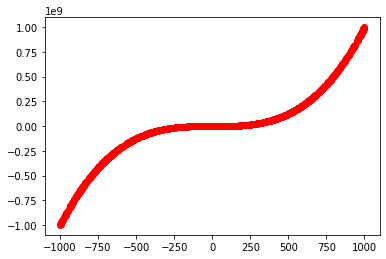

In [210]:
plt.scatter(x, y, color='red')

In [211]:
scaler_x = sklearn.preprocessing.StandardScaler()
scaler_x.fit(x.reshape(-1, 1))
normal_x = scaler_x.transform(x.reshape(-1, 1))

scaler_y = sklearn.preprocessing.StandardScaler()
scaler_y.fit(y.reshape(-1, 1))
normal_y = scaler_y.transform(y.reshape(-1, 1))

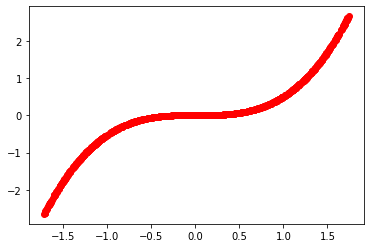

In [212]:
plt.scatter(normal_x, normal_y, color='red')

In [246]:
x_train, x_val, y_train, y_val = sklearn.model_selection.train_test_split(normal_x, normal_y, test_size=0.05, shuffle=True)

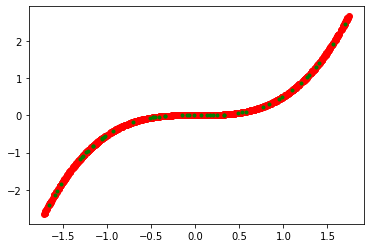

In [247]:
plt.scatter(x_train, y_train, color='red')
plt.scatter(x_val, y_val, color='green', marker = ".")

In [238]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1, input_shape=(1,), activation='swish'))
#model.add(tf.keras.layers.Dense(5, activation='relu'))
model.add(tf.keras.layers.Dense(1))

In [239]:
#model.build()
model.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_59 (Dense)            (None, 1)                 2         
                                                                 
 dense_60 (Dense)            (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [240]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.MeanSquaredError(),
    #metrics = ['accuracy'],
    metrics= ['mse'],
)

In [241]:
history = model.fit(
    x = np.array(x_train),
    y = np.array(y_train),
    validation_data = (np.array(x_val), np.array(y_val)),
    batch_size = 100,
    epochs = 300,
    shuffle = True,
)

Epoch 1/300
9/9 [==============================] - 0s 18ms/step - loss: 0.3676 - mse: 0.3676 - val_loss: 0.3545 - val_mse: 0.3545
Epoch 2/300
9/9 [==============================] - 0s 5ms/step - loss: 0.3590 - mse: 0.3590 - val_loss: 0.3479 - val_mse: 0.3479
Epoch 3/300
9/9 [==============================] - 0s 5ms/step - loss: 0.3502 - mse: 0.3502 - val_loss: 0.3416 - val_mse: 0.3416
Epoch 4/300
9/9 [==============================] - 0s 5ms/step - loss: 0.3426 - mse: 0.3426 - val_loss: 0.3356 - val_mse: 0.3356
Epoch 5/300
9/9 [==============================] - 0s 5ms/step - loss: 0.3347 - mse: 0.3347 - val_loss: 0.3301 - val_mse: 0.3301
Epoch 6/300
9/9 [==============================] - 0s 5ms/step - loss: 0.3275 - mse: 0.3275 - val_loss: 0.3249 - val_mse: 0.3249
Epoch 7/300
9/9 [==============================] - 0s 5ms/step - loss: 0.3208 - mse: 0.3208 - val_loss: 0.3200 - val_mse: 0.3200
Epoch 8/300
9/9 [==============================] - 0s 5ms/step - loss: 0.3147 - mse: 0.3147 - va

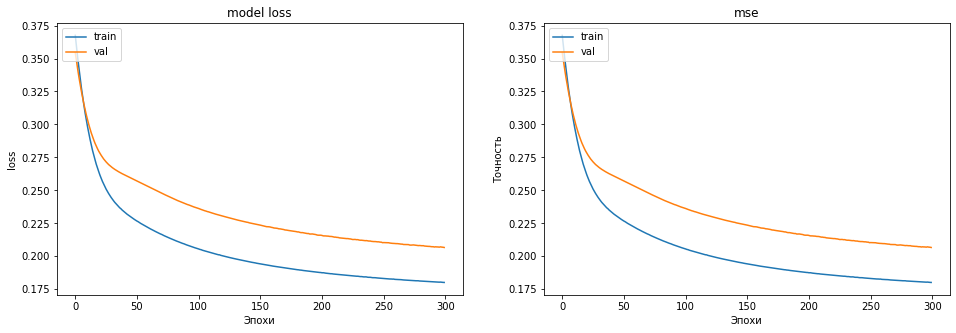

In [242]:
fig = plt.figure(figsize=(16, 5))

ax = fig.add_subplot(121)
ax.plot(history.history['loss'])
ax.plot(history.history['val_loss'])
ax.set_title('model loss')
ax.set_ylabel('loss')
ax.set_xlabel('Эпохи')
ax.legend(['train', 'val', 'runs'], loc='upper left')

ax = fig.add_subplot(122)
ax.plot(history.history['mse'])
ax.plot(history.history['val_mse'])
ax.set_title('mse')
ax.set_ylabel('Точность')
ax.set_xlabel('Эпохи')
ax.legend(['train', 'val', 'runs'], loc='upper left')

In [243]:
y_pred = model.predict(np.array(x_val))

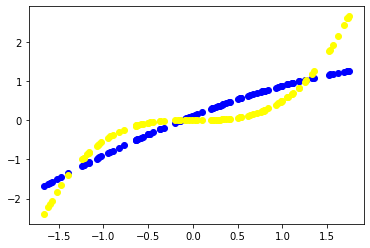

In [244]:
plt.scatter(x_val, y_pred, color='blue')
plt.scatter(x_val, y_val, color='yellow')

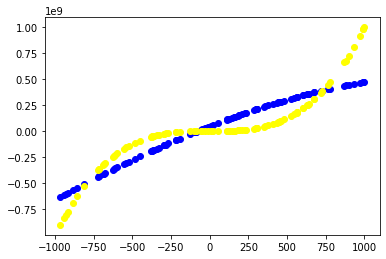

In [245]:
x_val_orig = scaler_x.inverse_transform(x_val)
y_pred_orig = scaler_y.inverse_transform(y_pred)
y_val_orig = scaler_y.inverse_transform(y_val)

plt.scatter(x_val_orig, y_pred_orig, color='blue')
plt.scatter(x_val_orig, y_val_orig, color='yellow')